In [1]:
import pandas as pd
import requests
import time

In [2]:
df  = pd.read_csv("iot_telemetry_data.csv")
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [3]:
new_df = df.drop(['ts','device','co','light','lpg','motion','smoke'],axis=1)
new_df.head()

,humidity,temp
0,51.000000,22.700000
1,76.000000,19.700001
2,50.900000,22.600000
3,76.800003,27.000000
4,50.900000,22.600000


In [4]:
new_df['temperature'] = [int(i) for i in new_df['temp']]
new_df.head(5)

,humidity,temp,temperature
0,51.000000,22.700000,22
1,76.000000,19.700001,19
2,50.900000,22.600000,22
3,76.800003,27.000000,27
4,50.900000,22.600000,22


In [5]:
new_df.drop(['temp','humidity'],axis=1, inplace=True)
new_df['condition'] = [1 if i>25 else 0 for i in new_df['temperature']]
new_df.head(7)

,temperature,condition
0,22,0
1,19,0
2,22,0
3,27,1
4,22,0
5,27,1
6,22,0


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

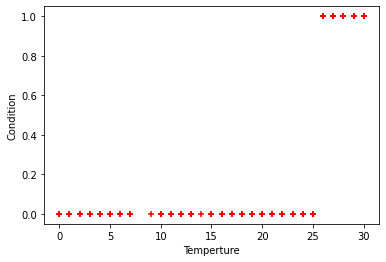

In [7]:
plt.xlabel('Temperture')
plt.ylabel('Condition')
plt.scatter(new_df['temperature'],new_df['condition'],marker="+",color='red')
plt.show()

In [8]:
x = new_df[['temperature']]
y = new_df[['condition']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [10]:
from sklearn.svm import SVC
model = SVC(C=7)

In [11]:
model.fit(X_train, y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=7)

In [12]:
model.score(x_test,y_test)

1.0

In [13]:
model.predict([[27]])

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [14]:
import joblib

In [15]:
joblib.dump(model, 'battery_model.pkl')

['battery_model.pkl']